In [1]:
%%time
import gzip
from tensorflow.keras.utils import to_categorical

Wall time: 4.45 s


In [2]:
%%time
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

Wall time: 223 ms


In [3]:
%%time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import  Aer, transpile, IBMQ, assemble
from qiskit.circuit.library import CHGate
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.operators import PrimitiveOp, CircuitStateFn
from qiskit.aqua.operators.primitive_ops import MatrixOp
from qiskit.aqua.operators.converters import CircuitSampler
from qiskit.aqua.operators.expectations import ExpectationFactory
from qiskit.aqua.operators.list_ops import ComposedOp
from qiskit.aqua.operators import ListOp
from qiskit.aqua.operators import Zero

Wall time: 2.78 s


In [20]:
%%time
provider = IBMQ.load_account()

Wall time: 2.18 s


In [4]:
%%time
# print(Aer.backends())
simulator = Aer.get_backend("statevector_simulator")
# simulator.set_option(method=)
my_sampler = CircuitSampler(backend=simulator, attach_results=True, param_qobj=False)  # read up on this more
my_expectation = ExpectationFactory()

Wall time: 5 ms


In [5]:
%%time
# EMNIST decoder

decoder = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

Wall time: 0 ns


In [6]:
%%time
images_raw = gzip.open("data/MNIST/MNIST_GZ/train-images-idx3-ubyte.gz", "r")
labels_raw = gzip.open("data/MNIST/MNIST_GZ/train-labels-idx1-ubyte.gz")


image_size = 28
num_images = 512 # how many images per batch

images_raw.read(16) # reads the data type
labels_raw.read(8) # reads the data type

def get_data(images, labels):
    buf_images = images.read(image_size * image_size * num_images)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(num_images, image_size, image_size, 1)
    
    buf_labels = labels.read(num_images)
    labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int32)
    
    return images, labels

Wall time: 2.96 ms


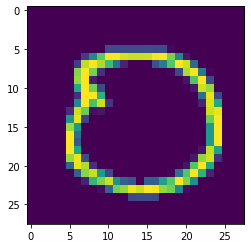

0
Wall time: 146 ms


In [7]:
%%time
# print images
data = get_data(images_raw, labels_raw)

images = data[0]
labels = data[1]



sort_index = np.argsort(data[1], axis=0)

sorted_images = data[0][sort_index]
sorted_labels = data[1][sort_index]

sorted_data = sorted_images, sorted_labels

image = np.asarray(sorted_images[1]).T.squeeze()
plt.imshow(image)
plt.show()

print(decoder[sorted_labels[1]])

In [8]:
%%time
print(sorted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 

In [9]:
%%time
def get_num_cls(data):
    labels = np.array(data[1])
    one_hot_labels = to_categorical(labels)
    
    return one_hot_labels.shape[1]


Wall time: 0 ns


In [10]:
%%time
N = get_num_cls(data)
print(N)

10
Wall time: 1.02 ms


In [146]:
class AdamOptim():
    """From https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc"""
    def __init__(self, num_of_keys=1, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw = {key: 0 for key in range(num_of_keys)}
        self.v_dw = {key: 0 for key in range(num_of_keys)}
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, key, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw[key] = self.beta1*self.m_dw[key] + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw[key] = self.beta2*self.v_dw[key] + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw[key]/(1-self.beta1**t + self.epsilon)
        m_db_corr = self.m_db/(1-self.beta1**t + self.epsilon)
        v_dw_corr = self.v_dw[key]/(1-self.beta2**t + self.epsilon)
        v_db_corr = self.v_db/(1-self.beta2**t + self.epsilon)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [151]:
# %%time

class Forward_and_backward:
    """see:
        https://arxiv.org/pdf/1908.08385.pdf
        equations 1 and 2
        also see:
        https://qiskit.org/documentation/stubs/qiskit.circuit.library.CHGate.html
    """
    def __init__(self, N, data, num_of_it):
        """"""
        self.num_of_it = num_of_it
        self.N = 1
        self.target_N = N
        self.SU_of_N = np.asarray([[1]])
        self.data = data
        self.alpha = np.arange(start=1, stop= self.target_N ** 2 + 1, dtype=np.complex_) # kind of like biases
        self.K = 1
        self.P = self.K * np.exp(1j * np.asarray([[0, -1j], [1j, 0]])) * self.K


    
    def H(self):
        """"""
        h = []
        
        for i in range(self.target_N):
            h.append([0])

        #print(h)
        
        for i in range(self.target_N):
            for k in range(self.target_N):
                term0 = np.exp(((1j * 2 * np.pi * i * k)  / self.target_N))
                try:
                    term1 = term1 + term0
                except:
                    term1 = term0

            h[i] = term1
        h = np.asarray(h, dtype=object)
        H_op = 1 / np.sqrt(self.target_N) * h

        return H_op
        
    def quNit(self):
        S3 = np.zeros(shape=(self.target_N, self.target_N))
        np.fill_diagonal(S3, val=-(self.target_N - 1) / 2)
        # print(self.x.shape)
        # print(self.W[self.i].shape)
        sum_of_weights = np.sum(np.vdot(self.W[self.i], self.x), ) # all x's of type i
        # print(sum_of_weights)
        Z = np.exp(1j * S3 * sum_of_weights)
        
        # Z_op = PrimitiveOp(Z)
        
        return Z * self.H() * Zero
 ##################################################   
    
    def driver_for_SUG(self):
        """finds the value for alpha which is a self.target_N set"""
        
        
        # print(self.SU_of_N.shape[0] * self.SU_of_N.shape[1])
        # print(self.alpha.shape)
        
        return self.SU_of_N / self.alpha.reshape(self.target_N, self.target_N)
    
    
    def direct_sum(self, a, b):
        """"""
        if isinstance(a, int) and a == 1:
            a = np.asarray([a])[np.newaxis]

        # print("a = ", a)
        # print("b = ", b)
        # dsum = np.zeros( np.add(a.shape,b.shape), dtype=np.complex_ )
        # dsum[:a.shape[0],:a.shape[1]]=a
        # dsum[a.shape[0]:,a.shape[1]:]=b
        dsum = a + b
        # print(dsum)
        return dsum

    def A(self, k, lie_alge, a):
        term0 = 1j * lie_alge * 3 * a * (2 * k - 3)
        term1 = np.exp(term0)
        term2 = 1j * lie_alge
        term3 = np.exp(term2)
        term4 = ((k-1) ** 2 + 1) * a * (2 * (k - 1))
        term5 = term3 * term4
        term6 = term1 * term5
        
        return term6

    def lie_algebra(self):
        
        if self.N == 1:
            return 1
        
        lie_alg = self.direct_sum(self.K,  self.P)
        
        # print("lie", lie_alg.shape)
        
        return lie_alg
    
    def mat(self):
        if self.N > 1:
            n = self.N
            mat = np.zeros(shape=(n, n), dtype=np.complex_)
            mat[0, n - 1] = -1j
            mat[n - 1, 0] = 1j
            
        else:
            mat = np.asarray([[1]], dtype=np.complex_)
        # print("mat", mat.shape)
        # print(mat)
        
        return mat
        
    
    def Euler_angle_param(self):
        """"""
        print("SU(N), N = ", self.N - 1)
        if self.N == self.target_N + 1:
            print("SU of N FOR {} FOUND".format(self.N - 1))
            return self.SU_of_N  
        

        if self.N < 2:
            A = 1
        else:
            A = np.array([0])
            lie_alge = self.lie_algebra()
            for k in range(self.target_N):
                #print(k)
                for a in self.alpha:
                    #print(a)
                    try:
                        B = self.A(k, lie_alge, a)
                        A = np.vdot(A, B)
                    except:
                        A = self.A(k, lie_alge, a)
                    
                    
        self.N += 1
        lie_algebra = self.lie_algebra()
        self.P = self.K * np.exp(1j * self.mat()) * self.K

        self.SU_of_N = self.K * lie_algebra * A
        self.K = self.Euler_angle_param()
        return self.SU_of_N
    ############################################
    
    
    def forward(self):
        """"""
        qr = QuantumRegister(1, 'a')
        cr = ClassicalRegister(1, 'creg')
        # init values for forward
        ket_x = self.quNit()
        SU_N = self.driver_for_SUG()
        
        # weighted ket_x
        ket_x = SU_N * ket_x

        ket_x_list = []
        ket_x = ListOp([ListOp([x for x in op]) for op in ket_x])
        for op in ket_x:
            row = []
            for x in op:
                coeff = x.coeff
                x = x.to_circuit_op().to_circuit()
                x.add_register(qr)
                x.add_register(cr)
                x.measure(qr[0], cr[0])
                # print("x = ", x)
                job = execute(x, simulator)
                result = job.result()
                outputstate = result.get_statevector(x, decimals=10)
                row.append(outputstate.tolist()[0] * coeff)
                # print("output = ", outputstate)
            ket_x_list.append(row)
            # print("row = ", row)
        
        ket_x = np.asarray(ket_x_list)
        
        def Purity(N, ket_x):
            """"""
            bra_x = np.asmatrix(ket_x).H
            
            return ((ket_x @ bra_x) / N) ** 2
            
        Pa = Purity(self.target_N, ket_x)
        print(Pa)
        Pb = np.argmax(np.diag(Pa))
        print("prediction = ", Pb)

        return Pb, ket_x

    def backward(self, pred_dict, i):
        """"""
        qr = QuantumRegister(1, 'b')
        cr = ClassicalRegister(1, 'creg_b')
        SU_N = np.asmatrix(self.driver_for_SUG())
        qc = self.quNit()
        Mk = self.target_N * self.target_N
        
        Pk = np.asarray(np.asmatrix(pred_dict[decoder[i]][1]) * np.asmatrix(pred_dict[decoder[i]][1]).H)  / Mk

        Pk = np.asarray(SU_N @ Pk @ SU_N.H)

        Pk = Pk * qc
        
        Pk_list = []
        Pk = ListOp([ListOp([x for x in op]) for op in Pk])
        for op in Pk:
            row = []
            for x in op:
                coeff = x.coeff
                x = x.to_circuit_op().to_circuit()
                x.add_register(qr)
                x.add_register(cr)
                x.measure(qr[0], cr[0])
                # print("x = ", x)
                job = execute(x, simulator)
                result = job.result()
                outputstate = result.get_statevector(x, decimals=10)
                row.append(outputstate.tolist()[0] * coeff)
                # print("output = ", outputstate)
            Pk_list.append(row)
            # print("row = ", row)
        
        Pk = np.asarray(Pk_list)
        
        Ek = 1 - Pk
        # print(Ek)
        return Ek
    
    
    #ERRROR PROBABLY HERE!!!
    def grad_function(self, E):
        """"""
        return E / self.target_N
        """M = self.target_N * self.target_N
        
        return 1 / M * 1 / 2 * self.target_N * (self.target_N + 1)"""
        
    def train(self):
        print("initializing SU(N)") # try except here for init of su(n)
        # self.Euler_angle_param()
        
        Mk = self.target_N * self.target_N
        pred_dict = {}
        total_error = 0
        init_W = True
        self.W = {}
        adam = AdamOptim(num_of_keys=self.target_N)
        
        
        for j in range(self.num_of_it):
            for i in range(self.target_N):
                self.i = i
                print("working on {}s".format(decoder[i]))
                sorted_images = self.data[0]
                sorted_labels = self.data[1]
                # print(sorted_labels.shape)
                y = sorted_labels[sorted_labels == i]
                # print(y)
                self.x = sorted_images[sorted_labels == i]
                
                try:
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=(0, -1))
                    # print(self.x.shape)
                except(ValueError):
                    # print(self.x.shape)
                    self.x = self.x.squeeze(axis=-1)
                    # print(self.x.shape)
                    
                """image = self.x[0]
                plt.imshow(image)
                plt.show()"""

                if init_W:
                    self.W[self.i] = np.random.uniform(high=1, low=0, size=self.x.shape) # learnable similar to weights

                pred_dict[decoder[i]] = self.forward()
                Ek = self.backward(pred_dict, i)

                total_error += Mk * Ek
                dw = self.grad_function(self.W[self.i])
                db = self.grad_function(self.alpha)
                print(self.W[self.i].shape)
                self.W[self.i], self.alpha = adam.update(key=i, t=j, w=self.W[self.i], b=self.alpha, dw=dw, db=db)
            total_error /= self.target_N
            init_W = False
            print(np.max(total_error.real))
                
                
                
                
                
            

In [152]:
# %time
train = Forward_and_backward(N, sorted_data, 10)

In [153]:
%%time
train.Euler_angle_param()

SU(N), N =  0
SU(N), N =  1
SU(N), N =  2
SU(N), N =  3
SU(N), N =  4
SU(N), N =  5
SU(N), N =  6
SU(N), N =  7
SU(N), N =  8
SU(N), N =  9
SU(N), N =  10
SU of N FOR 10 FOUND
Wall time: 180 ms


array([[-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -1.76400824e+12+3.42106296e+12j],
       [-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j],
       [-9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+12j, -9.48829767e+11+1.84013107e+12j,
        -9.48829767e+11+1.84013107e+

In [154]:
# %%time
train.train()

initializing SU(N)
working on 0s
[[4.56669941e+49+0.00000000e+00j 5.22634708e+47-1.17866331e+48j
  8.73221046e+47-7.84284034e+47j 7.82830500e+47-5.88275077e+47j
  6.76629899e+47-4.70767488e+47j 5.88780277e+47-3.92436063e+47j
  5.18806788e+47-3.36479349e+47j 4.62745505e+47-2.94504943e+47j
  4.17165814e+47-2.61852156e+47j 4.00596052e+47-1.36179206e+47j]
 [5.22634708e+47+1.17866331e+48j 8.45994214e+46+0.00000000e+00j
  5.03158234e+46+1.24646660e+46j 3.82057906e+46+1.23802857e+46j
  3.08564843e+46+1.10720068e+46j 2.59028551e+46+9.78852149e+45j
  2.23334104e+46+8.69903082e+45j 1.96373272e+46+7.79732133e+45j
  1.75280162e+46+7.04997101e+45j 1.32207104e+46+8.00463055e+45j]
 [8.73221046e+47+7.84284034e+47j 5.03158234e+46-1.24646660e+46j
  4.04913200e+46+0.00000000e+00j 3.17027546e+46+2.04406943e+45j
  2.61517239e+46+2.43085039e+45j 2.22074053e+46+2.41280032e+45j
  1.92818670e+46+2.28346530e+45j 1.70321434e+46+2.12911364e+45j
  1.52507321e+46+1.97766886e+45j 1.23742475e+46+4.03945854e+45j]
 [7.

(52, 28, 28)
working on 3s
[[1.33199351e+38+0.00000000e+00j 1.04840015e+38+1.96962497e+36j
  9.88737343e+37+2.74905288e+36j 9.50540695e+37+3.22716598e+36j
  9.22473018e+37+3.55325043e+36j 9.00335741e+37+3.78998559e+36j
  8.82098087e+37+3.96879628e+36j 8.66621028e+37+4.10746742e+36j
  8.53201190e+37+4.21695227e+36j 8.03140020e+37+6.26060141e+36j]
 [1.04840015e+38-1.96962497e+36j 8.35387743e+37+0.00000000e+00j
  7.85202748e+37+7.17356543e+35j 7.54826521e+37+1.15932696e+36j
  7.32518923e+37+1.46346147e+36j 7.14931152e+37+1.68669744e+36j
  7.00445124e+37+1.85745384e+36j 6.88153903e+37+1.99178773e+36j
  6.77497718e+37+2.09958408e+36j 6.39175616e+37+3.43558575e+36j]
 [9.88737343e+37-2.74905288e+36j 7.85202748e+37-7.17356543e+35j
  7.42442723e+37+0.00000000e+00j 7.11832143e+37+4.43291294e+35j
  6.90816162e+37+7.49676497e+35j 6.74245494e+37+9.75678153e+35j
  6.60596176e+37+1.14948124e+36j 6.49014075e+37+1.28701093e+36j
  6.38972018e+37+1.39807525e+36j 6.02907675e+37+2.70060436e+36j]
 [9.505406

(41, 28, 28)
working on 6s
[[8.96960040e+35+0.00000000e+00j 4.76456151e+35+7.88116649e+34j
  4.63400657e+35+7.54987551e+34j 4.54857810e+35+7.30892345e+34j
  4.48503641e+35+7.11824611e+34j 4.43451397e+35+6.95985571e+34j
  4.39264588e+35+6.82407934e+34j 4.35695415e+35+6.70508399e+34j
  4.52013657e+35+8.27070108e+34j 4.15612290e+35+5.81472353e+34j]
 [4.76456151e+35-7.88116649e+34j 2.67948633e+35+0.00000000e+00j
  2.60096190e+35-6.53538201e+32j 2.55194721e+35-1.21620095e+33j
  2.51539398e+35-1.69805796e+33j 2.48627354e+35-2.11847938e+33j
  2.46210365e+35-2.49164526e+33j 2.44147219e+35-2.82752832e+33j
  2.51499447e+35+2.51487304e+33j 2.32371675e+35-5.25138396e+33j]
 [4.63400657e+35-7.54987551e+34j 2.60096190e+35+6.53538201e+32j
  2.53185131e+35+0.00000000e+00j 2.48080082e+35-5.59404330e+32j
  2.44527174e+35-1.03726120e+33j 2.41696807e+35-1.45355520e+33j
  2.39347663e+35-1.82266140e+33j 2.37342470e+35-2.15461813e+33j
  2.44490041e+35+3.05587148e+33j 2.25900706e+35-4.54275953e+33j]
 [4.548578

(40, 28, 28)
working on 9s
[[1.69546558e+35+0.00000000e+00j 1.13865274e+35+4.78923490e+34j
  1.12032022e+35+4.69526546e+34j 1.10799557e+35+4.62721779e+34j
  1.09868735e+35+4.57344498e+34j 1.09120910e+35+4.52880018e+34j
  1.06192742e+35+4.72344043e+34j 1.05697480e+35+4.68807842e+34j
  1.08039333e+35+5.41296905e+34j 9.79159515e+34+4.38658766e+34j]
 [1.13865274e+35-4.78923490e+34j 1.00513656e+35+0.00000000e+00j
  9.71119191e+34-1.46388419e+32j 9.59821373e+34-2.83079255e+32j
  9.51230797e+34-4.04741818e+32j 9.44293541e+34-5.13562021e+32j
  9.33115341e+34+5.53095337e+32j 9.28224375e+34+4.52838640e+32j
  9.44314019e+34+2.77907215e+33j 8.70426541e+34+4.39497447e+32j]
 [1.12032022e+35-4.69526546e+34j 9.71119191e+34+1.46388419e+32j
  9.70718475e+34+0.00000000e+00j 9.43598573e+34-1.36468384e+32j
  9.35136630e+34-2.57810381e+32j 9.28303250e+34-3.66263462e+32j
  9.17284045e+34+6.84070800e+32j 9.12466361e+34+5.84369165e+32j
  9.28322694e+34+2.87756204e+33j 8.55622854e+34+5.62987344e+32j]
 [1.107995

(69, 28, 28)
working on 2s
[[6.48687913e+34+0.00000000e+00j 3.77160284e+34+7.96048745e+33j
  3.72577615e+34+7.75551806e+33j 3.69508968e+34+7.60864531e+33j
  3.67188092e+34+7.49204280e+33j 3.64972960e+34+6.50237935e+33j
  3.64633240e+34+7.04821902e+33j 3.63270299e+34+6.97542186e+33j
  3.61289190e+34+6.86490166e+33j 3.48744008e+34+7.08964812e+33j]
 [3.77160284e+34-7.96048745e+33j 2.32994298e+34+0.00000000e+00j
  2.30015378e+34-6.37417979e+31j 2.28016749e+34-1.12043231e+32j
  2.26497769e+34-1.51818241e+32j 2.24164203e+34-6.03075866e+32j
  2.24375667e+34-3.49002240e+32j 2.23479294e+34-3.75139667e+32j
  2.22272757e+34-4.11959682e+32j 2.15047337e+34-1.84080377e+32j]
 [3.72577615e+34-7.75551806e+33j 2.30015378e+34+6.37417979e+31j
  2.27103198e+34+0.00000000e+00j 2.25118121e+34-4.82314088e+31j
  2.23619555e+34-8.79133312e+31j 2.21328703e+34-5.34053569e+32j
  2.21530030e+34-2.83153277e+32j 2.20645776e+34-3.09201300e+32j
  2.19455643e+34-3.45886188e+32j 2.12315686e+34-1.22889716e+32j]
 [3.695089

(52, 28, 28)
working on 5s
[[3.68376689e+34+0.00000000e+00j 1.58340352e+34+3.99965819e+33j
  1.56705371e+34+3.91081782e+33j 1.55577391e+34+3.84670882e+33j
  1.54717485e+34+3.79577818e+33j 1.87403523e+34+1.81154123e+33j
  1.65230994e+34+3.52211633e+33j 1.64631217e+34+3.48760794e+33j
  1.64238938e+34+3.06609255e+33j 1.54302489e+34+4.14998615e+33j]
 [1.58340352e+34-3.99965819e+33j 9.99889522e+33+0.00000000e+00j
  9.54888491e+33-2.65931796e+31j 9.46646828e+33-4.67369365e+31j
  9.40366942e+33-6.33841664e+31j 9.93696580e+33-7.04623658e+32j
  9.54845575e+33-2.07610890e+32j 9.50976247e+33-2.18959237e+32j
  9.45348083e+33-3.13345807e+32j 9.00675971e+33-2.96777403e+31j]
 [1.56705371e+34-3.91081782e+33j 9.54888491e+33+2.65931796e+31j
  9.73856045e+33+0.00000000e+00j 9.34788544e+33-2.00770668e+31j
  9.28568487e+33-3.66390652e+31j 9.81747037e+33-6.71764272e+32j
  9.43011762e+33-1.79160932e+32j 9.39178504e+33-1.90428079e+32j
  9.33622972e+33-2.84238986e+32j 8.89459213e+33-3.64725765e+30j]
 [1.555773

(54, 28, 28)
working on 8s
[[3.74352506e+34+0.00000000e+00j 1.59343074e+34+4.62569682e+33j
  1.57652146e+34+4.54505816e+33j 1.56489617e+34+4.48558992e+33j
  1.55604472e+34+4.43804244e+33j 1.93412760e+34+4.21316793e+33j
  1.65637113e+34+4.73418921e+33j 1.65044423e+34+4.69736525e+33j
  1.66441449e+34+4.32436387e+33j 1.53770899e+34+4.41587859e+33j]
 [1.59343074e+34-4.62569682e+33j 1.00273429e+34+0.00000000e+00j
  9.57793114e+33-1.92797547e+31j 9.49501635e+33-3.51782841e+31j
  9.43189776e+33-4.87223242e+31j 1.01884195e+34-3.50552961e+32j
  9.60392434e+33-6.61503650e+31j 9.56530429e+33-7.65836898e+31j
  9.55013001e+33-1.71149779e+32j 8.98354662e+33-7.36067589e+31j]
 [1.57652146e+34-4.54505816e+33j 9.57793114e+33+1.92797547e+31j
  9.76526316e+33+0.00000000e+00j 9.37546083e+33-1.58788819e+31j
  9.31291389e+33-2.93941890e+31j 1.00647605e+34-3.28042944e+32j
  9.48394921e+33-4.64078023e+31j 9.44567080e+33-5.68015441e+31j
  9.43078839e+33-1.50716800e+32j 8.87086692e+33-5.49578838e+31j]
 [1.564896

(50, 28, 28)
working on 1s
[[3.82121735e+34+0.00000000e+00j 1.65566030e+34+4.81572802e+33j
  1.63780360e+34+4.73257948e+33j 1.62556239e+34+4.67117646e+33j
  1.61625051e+34+4.62206036e+33j 1.98718081e+34+4.61500925e+33j
  1.71153450e+34+4.97182890e+33j 1.70539826e+34+4.93369243e+33j
  1.72070431e+34+4.57711124e+33j 1.59034559e+34+4.53544003e+33j]
 [1.65566030e+34-4.81572802e+33j 1.03634826e+34+0.00000000e+00j
  9.92946219e+33-1.92604841e+31j 9.84343736e+33-3.53126732e+31j
  9.77796435e+33-4.90341004e+31j 1.05619673e+34-3.04770105e+32j
  9.94992316e+33-5.01340710e+31j 9.90995272e+33-6.08480265e+31j
  9.89916343e+33-1.55698390e+32j 9.30745372e+33-8.19729136e+31j]
 [1.63780360e+34-4.73257948e+33j 9.92946219e+33+1.92604841e+31j
  1.00934093e+34+0.00000000e+00j 9.71936165e+33-1.60360739e+31j
  9.65450354e+33-2.97330393e+31j 1.04332267e+34-2.82605411e+32j
  9.82538490e+33-3.05886476e+31j 9.78578223e+33-4.12653438e+31j
  9.77524623e+33-1.35429081e+32j 9.19050886e+33-6.33496042e+31j]
 [1.625562

(52, 28, 28)
working on 4s
[[4.50227617e+34+0.00000000e+00j 2.29512249e+34+4.88975647e+33j
  2.26894987e+34+4.75780091e+33j 2.25121335e+34+4.66378039e+33j
  2.23775998e+34+4.58931359e+33j 2.40289704e+34+2.06255378e+33j
  2.29589768e+34+3.95420498e+33j 2.28732633e+34+3.90838913e+33j
  2.26816133e+34+3.58341043e+33j 2.17406997e+34+4.86415082e+33j]
 [2.29512249e+34-4.88975647e+33j 1.40679158e+34+0.00000000e+00j
  1.37495641e+34-4.28509695e+31j 1.36307282e+34-7.44713164e+31j
  1.35402601e+34-1.00291602e+32j 1.38043697e+34-1.00140128e+33j
  1.36001885e+34-3.59183787e+32j 1.35451548e+34-3.75718948e+32j
  1.34394868e+34-4.67263344e+32j 1.29756613e+34-2.50396377e+31j]
 [2.26894987e+34-4.75780091e+33j 1.37495641e+34+4.28509695e+31j
  1.37113757e+34+0.00000000e+00j 1.34594591e+34-3.15431963e+31j
  1.33701145e+34-5.72640228e+31j 1.36349177e+34-9.48402529e+32j
  1.34305714e+34-3.13112051e+32j 1.33762181e+34-3.29559855e+32j
  1.32719852e+34-4.20466466e+32j 1.28128569e+34+1.60849078e+31j]
 [2.251213

(46, 28, 28)
working on 7s
[[4.00355996e+34+0.00000000e+00j 1.87384184e+34+4.29310724e+33j
  1.85346681e+34+4.18537678e+33j 1.83954359e+34+4.10828642e+33j
  1.82895864e+34+4.04717546e+33j 2.07974684e+34+1.61458990e+33j
  1.91452566e+34+3.54883372e+33j 1.90745878e+34+3.50999458e+33j
  1.89482697e+34+3.12445221e+33j 1.80112870e+34+4.41459659e+33j]
 [1.87384184e+34-4.29310724e+33j 1.16193835e+34+0.00000000e+00j
  1.12357102e+34-3.39572995e+31j 1.11386897e+34-5.91890819e+31j
  1.10647861e+34-7.98695559e+31j 1.14847185e+34-8.72417179e+32j
  1.11792012e+34-2.84718850e+32j 1.11338702e+34-2.98273656e+32j
  1.10534093e+34-3.93722495e+32j 1.06113690e+34-2.03689983e+31j]
 [1.85346681e+34-4.18537678e+33j 1.12357102e+34+3.39572995e+31j
  1.13214119e+34+0.00000000e+00j 1.09990633e+34-2.51538817e+31j
  1.09259831e+34-4.57350876e+31j 1.13452875e+34-8.30100892e+32j
  1.10403598e+34-2.48179179e+32j 1.09955279e+34-2.61643689e+32j
  1.09161299e+34-3.56456701e+32j 1.04788297e+34+1.25916977e+31j]
 [1.839543

(56, 28, 28)
6.01527192676702e+47
working on 0s
[[6.78192287e+34+0.00000000e+00j 3.94196030e+34+8.94972044e+33j
  3.89367431e+34+8.74126169e+33j 3.86140267e+34+8.59059854e+33j
  3.83701345e+34+8.47070310e+33j 3.82787896e+34+8.64034253e+33j
  3.80098071e+34+8.37341336e+33j 3.78684898e+34+8.29623339e+33j
  3.77733714e+34+8.23257768e+33j 3.63279516e+34+7.78059816e+33j]
 [3.94196030e+34-8.94972044e+33j 2.43786011e+34+0.00000000e+00j
  2.40671813e+34-5.82441243e+31j 2.38574446e+34-1.03847324e+32j
  2.36980982e+34-1.41862687e+32j 2.36501379e+34-5.40231479e+31j
  2.34710511e+34-1.59911252e+32j 2.33776594e+34-1.86404250e+32j
  2.33102539e+34-2.10959147e+32j 2.24204217e+34-2.74043830e+32j]
 [3.89367431e+34-8.74126169e+33j 2.40671813e+34+5.82441243e+31j
  2.37599100e+34+0.00000000e+00j 2.35529467e+34-4.55218918e+31j
  2.33957267e+34-8.34324988e+31j 2.33481553e+34+3.12928620e+30j
  2.31716236e+34-1.01806635e+32j 2.30794881e+34-1.28184368e+32j
  2.30129981e+34-1.52587689e+32j 2.21347103e+34-2.1697

(52, 28, 28)
working on 3s
[[6.09699513e+34+0.00000000e+00j 3.50157752e+34+7.23504867e+33j
  3.45930528e+34+7.04196002e+33j 3.43095604e+34+6.90404055e+33j
  3.40950663e+34+6.79465225e+33j 3.40921270e+34+5.27046279e+33j
  3.39846426e+34+6.22814518e+33j 3.38572891e+34+6.16061019e+33j
  3.36316619e+34+6.00797705e+33j 3.24736674e+34+6.56689466e+33j]
 [3.50157752e+34-7.23504867e+33j 2.15548431e+34+0.00000000e+00j
  2.12721570e+34-6.18641638e+31j 2.10875555e+34-1.08220543e+32j
  2.09472156e+34-1.46239010e+32j 2.07644615e+34-8.27720212e+32j
  2.07898268e+34-4.03061508e+32j 2.07065162e+34-4.27586448e+32j
  2.05737363e+34-4.79048036e+32j 1.99344511e+34-1.30971643e+32j]
 [3.45930528e+34-7.04196002e+33j 2.12721570e+34+6.18641638e+31j
  2.10108516e+34+0.00000000e+00j 2.08201357e+34-4.62898187e+31j
  2.06816822e+34-8.42191806e+31j 2.05033343e+34-7.57768143e+32j
  2.05270834e+34-3.38259462e+32j 2.04448978e+34-3.62703950e+32j
  2.03139382e+34-4.13908209e+32j 1.96817436e+34-7.19505751e+31j]
 [3.430956

(41, 28, 28)
working on 6s
[[6.79697899e+34+0.00000000e+00j 3.95870202e+34+8.87686843e+33j
  3.91025090e+34+8.66668879e+33j 3.87786273e+34+8.51500055e+33j
  3.85338269e+34+8.39433518e+33j 3.83695415e+34+8.39280972e+33j
  3.81700159e+34+8.23852697e+33j 3.80279791e+34+8.16127300e+33j
  3.79136687e+34+8.09452820e+33j 3.64936546e+34+7.73769723e+33j]
 [3.95870202e+34-8.87686843e+33j 2.44946132e+34+0.00000000e+00j
  2.41818301e+34-5.98766106e+31j 2.39711640e+34-1.06488231e+32j
  2.38111061e+34-1.45261214e+32j 2.37087076e+34-1.33451215e+32j
  2.35757075e+34-1.92230593e+32j 2.34818526e+34-2.18969011e+32j
  2.34046464e+34-2.43194604e+32j 2.25362611e+34-2.64407738e+32j]
 [3.91025090e+34-8.66668879e+33j 2.41818301e+34+5.98766106e+31j
  2.38731887e+34+0.00000000e+00j 2.36653266e+34-4.65314000e+31j
  2.35074075e+34-8.52005518e+31j 2.34062815e+34-7.38062544e+31j
  2.32751296e+34-1.32150531e+32j 2.31825386e+34-1.58776922e+32j
  2.31063759e+34-1.82882130e+32j 2.22491552e+34-2.05942205e+32j]
 [3.877862

(40, 28, 28)
working on 9s
[[4.55769449e+34+0.00000000e+00j 2.33922355e+34+4.96299602e+33j
  2.31244977e+34+4.82861993e+33j 2.29431709e+34+4.73289432e+33j
  2.28056544e+34+4.65707883e+33j 2.43808171e+34+2.13731630e+33j
  2.33608108e+34+4.01422751e+33j 2.32735272e+34+3.96765214e+33j
  2.30772711e+34+3.64865368e+33j 2.21324292e+34+4.91954800e+33j]
 [2.33922355e+34-4.96299602e+33j 1.43299687e+34+0.00000000e+00j
  1.40162191e+34-4.36843804e+31j 1.38950520e+34-7.59163455e+31j
  1.38028144e+34-1.02233276e+32j 1.40505004e+34-1.00963976e+33j
  1.38565537e+34-3.65260512e+32j 1.38004918e+34-3.82092626e+32j
  1.36926148e+34-4.72969254e+32j 1.32252555e+34-2.62749422e+31j]
 [2.31244977e+34-4.82861993e+33j 1.40162191e+34+4.36843804e+31j
  1.39670133e+34+0.00000000e+00j 1.37203929e+34-3.21552384e+31j
  1.36293088e+34-5.83730986e+31j 1.38778346e+34-9.55689578e+32j
  1.36836423e+34-3.18308399e+32j 1.36282786e+34-3.35053725e+32j
  1.35218693e+34-4.25296696e+32j 1.30592295e+34+1.56109846e+31j]
 [2.294317

(69, 28, 28)
working on 2s
[[3.88543747e+34+0.00000000e+00j 1.76784407e+34+4.17145733e+33j
  1.74894155e+34+4.07029275e+33j 1.73598519e+34+3.99774311e+33j
  1.72612674e+34+3.94020117e+33j 2.00261866e+34+1.60837548e+33j
  1.81899164e+34+3.50368623e+33j 1.81230916e+34+3.46649736e+33j
  1.80221749e+34+3.06615434e+33j 1.70732379e+34+4.31645712e+33j]
 [1.76784407e+34-4.17145733e+33j 1.10214643e+34+0.00000000e+00j
  1.06152452e+34-3.14405695e+31j 1.05235897e+34-5.49086889e+31j
  1.04537631e+34-7.41839671e+31j 1.09128420e+34-8.22160562e+32j
  1.05799771e+34-2.60256773e+32j 1.05370654e+34-2.73025777e+32j
  1.04644205e+34-3.68520666e+32j 1.00235799e+34-2.20053976e+31j]
 [1.74894155e+34-4.07029275e+33j 1.06152452e+34+3.14405695e+31j
  1.07374561e+34+0.00000000e+00j 1.03917129e+34-2.33922462e+31j
  1.03226295e+34-4.25709293e+31j 1.07807746e+34-7.83022661e+32j
  1.04486856e+34-2.26460098e+32j 1.04062239e+34-2.39140107e+32j
  1.03345294e+34-3.34015011e+32j 9.89851635e+33+8.61491093e+30j]
 [1.735985

(52, 28, 28)
working on 5s
[[4.54777202e+34+0.00000000e+00j 2.33086393e+34+4.95087902e+33j
  2.30420397e+34+4.81696038e+33j 2.28614614e+34+4.72155689e+33j
  2.27245082e+34+4.64599616e+33j 2.43153808e+34+2.12404066e+33j
  2.32853063e+34+4.00457769e+33j 2.31983135e+34+3.95814410e+33j
  2.30029503e+34+3.63781040e+33j 2.20585941e+34+4.91122144e+33j]
 [2.33086393e+34-4.95087902e+33j 1.42801000e+34+0.00000000e+00j
  1.39653281e+34-4.35125037e+31j 1.38445996e+34-7.56189662e+31j
  1.37526947e+34-1.01834474e+32j 1.40037191e+34-1.00823693e+33j
  1.38077613e+34-3.64091842e+32j 1.37518916e+34-3.80863732e+32j
  1.36444324e+34-4.71909621e+32j 1.31776942e+34-2.59327753e+31j]
 [2.30420397e+34-4.81696038e+33j 1.39653281e+34+4.35125037e+31j
  1.39183430e+34+0.00000000e+00j 1.36705788e+34-3.20296245e+31j
  1.35798218e+34-5.81459503e+31j 1.38316559e+34-9.54479684e+32j
  1.36354685e+34-3.17320085e+32j 1.35802936e+34-3.34005040e+32j
  1.34742959e+34-4.24416009e+32j 1.30122742e+34+1.57955583e+31j]
 [2.286146

(54, 28, 28)
working on 8s
[[6.73038835e+34+0.00000000e+00j 3.92736125e+34+8.54207984e+33j
  3.87942706e+34+8.33129263e+33j 3.84736254e+34+8.17971432e+33j
  3.82311979e+34+8.05925401e+33j 3.79667273e+34+7.58707779e+33j
  3.78932522e+34+7.75620045e+33j 3.77519183e+34+7.68006974e+33j
  3.75922371e+34+7.59761481e+33j 3.62467086e+34+7.51125731e+33j]
 [3.92736125e+34-8.54207984e+33j 2.43030785e+34+0.00000000e+00j
  2.39930812e+34-6.28568010e+31j 2.37842723e+34-1.11115513e+32j
  2.36256057e+34-1.51052128e+32j 2.34231766e+34-3.59180573e+32j
  2.33871460e+34-2.74294515e+32j 2.32938911e+34-3.01149257e+32j
  2.31929187e+34-3.28634187e+32j 2.23902631e+34-2.30331322e+32j]
 [3.87942706e+34-8.33129263e+33j 2.39930812e+34+6.28568010e+31j
  2.36872894e+34+0.00000000e+00j 2.34812253e+34-4.81830596e+31j
  2.33246857e+34-8.80204409e+31j 2.31254042e+34-2.93978929e+32j
  2.30895897e+34-2.10292993e+32j 2.29975937e+34-2.37046322e+32j
  2.28979850e+34-2.64442027e+32j 2.21053129e+34-1.69496691e+32j]
 [3.847362

(50, 28, 28)
working on 1s
[[6.76608301e+34+0.00000000e+00j 3.94798246e+34+8.66083792e+33j
  3.89975203e+34+8.44961590e+33j 3.86749653e+34+8.29757125e+33j
  3.84311154e+34+8.17670673e+33j 3.81817108e+34+7.84188293e+33j
  3.80805741e+34+7.91466882e+33j 3.79386316e+34+7.83801152e+33j
  3.77911260e+34+7.76114428e+33j 3.64229930e+34+7.59452560e+33j]
 [3.94798246e+34-8.66083792e+33j 2.44343229e+34+0.00000000e+00j
  2.41225529e+34-6.22030248e+31j 2.39125451e+34-1.10142360e+32j
  2.37529741e+34-1.49871422e+32j 2.35724696e+34-2.92885841e+32j
  2.35125624e+34-2.51524226e+32j 2.34188521e+34-2.78424317e+32j
  2.33242865e+34-3.04384464e+32j 2.25015226e+34-2.41241740e+32j]
 [3.89975203e+34-8.44961590e+33j 2.41225529e+34+6.22030248e+31j
  2.38149341e+34+0.00000000e+00j 2.36077211e+34-4.78621927e+31j
  2.34502874e+34-8.74904593e+31j 2.32724671e+34-2.29111287e+32j
  2.32132039e+34-1.88448019e+32j 2.31207578e+34-2.15243439e+32j
  2.30274682e+34-2.41113018e+32j 2.22150502e+34-1.80892062e+32j]
 [3.867496

(52, 28, 28)
working on 4s
[[6.74615040e+34+0.00000000e+00j 3.90855928e+34+9.01020418e+33j
  3.86063526e+34+8.80441356e+33j 3.82861076e+34+8.65543223e+33j
  3.80441124e+34+8.53682331e+33j 3.80561046e+34+8.88934710e+33j
  3.76959878e+34+8.50544962e+33j 3.75559408e+34+8.42860116e+33j
  3.74830773e+34+8.36635596e+33j 3.60102349e+34+7.81415771e+33j]
 [3.90855928e+34-9.01020418e+33j 2.41504198e+34+0.00000000e+00j
  2.38416515e+34-5.61139977e+31j 2.36337701e+34-1.00358149e+32j
  2.34758371e+34-1.37337551e+32j 2.34975969e+34+2.74477871e+31j
  2.32623426e+34-1.24169065e+32j 2.31698048e+34-1.50263074e+32j
  2.31134060e+34-1.76226127e+32j 2.22018748e+34-2.82168334e+32j]
 [3.86063526e+34-8.80441356e+33j 2.38416515e+34+5.61139977e+31j
  2.35372244e+34+0.00000000e+00j 2.33319736e+34-4.41621812e+31j
  2.31761448e+34-8.10364605e+31j 2.31972291e+34+8.16244201e+31j
  2.29653515e+34-6.85547426e+31j 2.28740568e+34-9.45305709e+31j
  2.28184322e+34-1.20295595e+32j 2.19188217e+34-2.26964673e+32j]
 [3.828610

(46, 28, 28)
working on 7s
[[6.79815256e+34+0.00000000e+00j 3.96289973e+34+8.82028235e+33j
  3.91442199e+34+8.60931888e+33j 3.88201130e+34+8.45720522e+33j
  3.85751243e+34+8.33623082e+33j 3.83731634e+34+8.21922435e+33j
  3.82128656e+34+8.14244523e+33j 3.80705729e+34+8.06525658e+33j
  3.79441051e+34+7.99555703e+33j 3.65410993e+34+7.70362871e+33j]
 [3.96289973e+34-8.82028235e+33j 2.45249986e+34+0.00000000e+00j
  2.42118812e+34-6.07958231e+31j 2.40009833e+34-1.07955557e+32j
  2.38407449e+34-1.47133568e+32j 2.37071600e+34-1.88174892e+32j
  2.36018790e+34-2.13344452e+32j 2.35078763e+34-2.40185389e+32j
  2.34243474e+34-2.64677506e+32j 2.25708934e+34-2.56969666e+32j]
 [3.91442199e+34-8.60931888e+33j 2.42118812e+34+6.07958231e+31j
  2.39029129e+34+0.00000000e+00j 2.36948248e+34-4.70804215e+31j
  2.35367294e+34-8.61554451e+31j 2.34049529e+34-1.27001718e+32j
  2.33010775e+34-1.52112355e+32j 2.32083416e+34-1.78843631e+32j
  2.31259401e+34-2.03230085e+32j 2.22833830e+34-1.97741807e+32j]
 [3.882011

(56, 28, 28)
6.015271915261349e+44
working on 0s
[[6.77372392e+34+0.00000000e+00j 3.95209337e+34+8.68810010e+33j
  3.90380153e+34+8.47680068e+33j 3.87150645e+34+8.32466616e+33j
  3.84709201e+34+8.20372264e+33j 3.82261666e+34+7.89837192e+33j
  3.81181101e+34+7.95064676e+33j 3.79760413e+34+7.87387899e+33j
  3.78312273e+34+7.79808925e+33j 3.64580222e+34+7.61424502e+33j]
 [3.95209337e+34-8.68810010e+33j 2.44599543e+34+0.00000000e+00j
  2.41478204e+34-6.20350842e+31j 2.39375692e+34-1.09887292e+32j
  2.37778144e+34-1.49557590e+32j 2.36027436e+34-2.78643533e+32j
  2.35372180e+34-2.46496039e+32j 2.34434147e+34-2.73398424e+32j
  2.33502618e+34-2.99090814e+32j 2.25230857e+34-2.43486269e+32j]
 [3.90380153e+34-8.47680068e+33j 2.41478204e+34+6.20350842e+31j
  2.38398360e+34+0.00000000e+00j 2.36323853e+34-4.77747325e+31j
  2.34747698e+34-8.73438874e+31j 2.33022753e+34-2.15201215e+32j
  2.32374911e+34-1.83646403e+32j 2.31449531e+34-2.10443395e+32j
  2.30530570e+34-2.36044084e+32j 2.22363058e+34-1.832

(52, 28, 28)
working on 3s
[[6.10195875e+34+0.00000000e+00j 3.50403553e+34+7.24660923e+33j
  3.46172712e+34+7.05337872e+33j 3.43335364e+34+6.91535747e+33j
  3.41188594e+34+6.80588800e+33j 3.41161169e+34+5.28008672e+33j
  3.40087448e+34+6.23879999e+33j 3.38812798e+34+6.17121441e+33j
  3.36554499e+34+6.01834817e+33j 3.24965446e+34+6.57805304e+33j]
 [3.50403553e+34-7.24660923e+33j 2.15691730e+34+0.00000000e+00j
  2.12862359e+34-6.18500742e+31j 2.11014829e+34-1.08200325e+32j
  2.09610276e+34-1.46216334e+32j 2.07780622e+34-8.28349735e+32j
  2.08036366e+34-4.03291876e+32j 2.07202561e+34-4.27816786e+32j
  2.05873486e+34-4.79337979e+32j 1.99477041e+34-1.30779993e+32j]
 [3.46172712e+34-7.05337872e+33j 2.12862359e+34+6.18500742e+31j
  2.10247358e+34+0.00000000e+00j 2.08338449e+34-4.62836206e+31j
  2.06952777e+34-8.42104314e+31j 2.05167216e+34-7.58402943e+32j
  2.05406772e+34-3.38499823e+32j 2.04584226e+34-3.62944201e+32j
  2.03273373e+34-4.14207279e+32j 1.96947888e+34-7.17736810e+31j]
 [3.433353

(41, 28, 28)
working on 6s
[[3.76233967e+34+0.00000000e+00j 1.60593098e+34+4.66939913e+33j
  1.58883389e+34+4.58826805e+33j 1.57708517e+34+4.52841997e+33j
  1.56814108e+34+4.48056432e+33j 1.94552979e+34+4.29301837e+33j
  1.66778574e+34+4.78792524e+33j 1.66181375e+34+4.75082582e+33j
  1.67607274e+34+4.38011172e+33j 1.54850602e+34+4.44842784e+33j]
 [1.60593098e+34-4.66939913e+33j 1.00959362e+34+0.00000000e+00j
  9.64834133e+33-1.92397736e+31j 9.56478076e+33-3.51425814e+31j
  9.50117224e+33-4.87016722e+31j 1.02632508e+34-3.43407965e+32j
  9.67360658e+33-6.31507954e+31j 9.63470063e+33-7.36278602e+31j
  9.62029317e+33-1.68389647e+32j 9.04861030e+33-7.46555182e+31j]
 [1.58883389e+34-4.58826805e+33j 9.64834133e+33+1.92397736e+31j
  9.83211622e+33+0.00000000e+00j 9.44429021e+33-1.58838772e+31j
  9.38126140e+33-2.94150884e+31j 1.01385529e+34-3.20991256e+32j
  9.55268603e+33-4.34809783e+31j 9.51412658e+33-5.39189202e+31j
  9.50000397e+33-1.48022576e+32j 8.93504757e+33-5.60505517e+31j]
 [1.577085

(40, 28, 28)
working on 9s
[[4.75105188e+34+0.00000000e+00j 2.39042498e+34+6.63191552e+33j
  2.36205504e+34+6.51256332e+33j 2.34295057e+34+6.42446896e+33j
  2.32849663e+34+6.35399045e+33j 2.58700408e+34+7.45142694e+33j
  2.37253577e+34+6.87709273e+33j 2.36386680e+34+6.82518048e+33j
  2.38078395e+34+6.60951191e+33j 2.22983144e+34+5.82988431e+33j]
 [2.39042498e+34-6.63191552e+33j 1.45575488e+34+0.00000000e+00j
  1.42456281e+34-2.48345336e+31j 1.41215199e+34-4.61786155e+31j
  1.40271738e+34-6.45824448e+31j 1.48820280e+34+5.85306605e+31j
  1.41412537e+34+4.80561919e+31j 1.40848014e+34+3.31411483e+31j
  1.40975828e+34-5.29195287e+31j 1.32967191e+34-1.69745768e+32j]
 [2.36205504e+34-6.51256332e+33j 1.42456281e+34+2.48345336e+31j
  1.41855258e+34+0.00000000e+00j 1.39420722e+34-2.13194704e+31j
  1.38488511e+34-3.96892954e+31j 1.46948092e+34+8.29171883e+31j
  1.39618233e+34+7.17853839e+31j 1.39060438e+34+5.69284002e+31j
  1.39188388e+34-2.82630490e+31j 1.31278769e+34-1.45146238e+32j]
 [2.342950

(69, 28, 28)
working on 2s
[[3.67462463e+34+0.00000000e+00j 1.53597482e+34+4.43359931e+33j
  1.51996719e+34+4.35492039e+33j 1.50892565e+34+4.29703027e+33j
  1.50050986e+34+4.25077762e+33j 1.88402622e+34+3.74030061e+33j
  1.60616297e+34+4.47325483e+33j 1.60042173e+34+4.43772081e+33j
  1.61241280e+34+4.04603771e+33j 1.49010878e+34+4.30829363e+33j]
 [1.53597482e+34-4.43359931e+33j 9.72251961e+33+0.00000000e+00j
  9.25644787e+33-1.95466102e+31j 9.17635758e+33-3.54435232e+31j
  9.11537360e+33-4.89260548e+31j 9.83681712e+33-4.06533074e+32j
  9.28630227e+33-8.61319459e+31j 9.24889579e+33-9.63338634e+31j
  9.22808620e+33-1.90584115e+32j 8.68906700e+33-6.39822684e+31j]
 [1.51996719e+34-4.35492039e+33j 9.25644787e+33+1.95466102e+31j
  9.46754990e+33+0.00000000e+00j 9.06091855e+33-1.58714760e+31j
  9.00046655e+33-2.93183006e+31j 9.71793317e+33-3.83370500e+32j
  9.17051398e+33-6.59110010e+31j 9.13342519e+33-7.60687588e+31j
  9.11295683e+33-1.69706405e+32j 8.58026928e+33-4.50425960e+31j]
 [1.508925

(52, 28, 28)
working on 5s
[[5.68181460e+34+0.00000000e+00j 3.20183430e+34+6.56058473e+33j
  3.16350606e+34+6.38170781e+33j 3.13775603e+34+6.25419887e+33j
  3.11826528e+34+6.15313790e+33j 3.15030404e+34+4.22371712e+33j
  3.12362335e+34+5.51430981e+33j 3.11190031e+34+5.45237101e+33j
  3.08835598e+34+5.25599223e+33j 2.98031169e+34+6.08060386e+33j]
 [3.20183430e+34-6.56058473e+33j 1.96412635e+34+0.00000000e+00j
  1.93664177e+34-5.81830264e+31j 1.91985276e+34-1.01457581e+32j
  1.90708522e+34-1.36857650e+32j 1.89862674e+34-9.62739086e+32j
  1.89741825e+34-4.22204607e+32j 1.88979208e+34-4.44808031e+32j
  1.87635018e+34-5.10060470e+32j 1.81878360e+34-8.92512523e+31j]
 [3.16350606e+34-6.38170781e+33j 1.93664177e+34+5.81830264e+31j
  1.91460588e+34+0.00000000e+00j 1.89556268e+34-4.32076659e+31j
  1.88296589e+34-7.85185239e+31j 1.87488419e+34-8.94752310e+32j
  1.87351773e+34-3.60640135e+32j 1.86599384e+34-3.83165817e+32j
  1.85273707e+34-4.48027819e+32j 1.79577580e+34-3.38818892e+31j]
 [3.137756

(54, 28, 28)
working on 8s
[[3.90267629e+34+0.00000000e+00j 1.71865062e+34+5.00128548e+33j
  1.69985154e+34+4.91540232e+33j 1.68699586e+34+4.85192744e+33j
  1.67722407e+34+4.80113973e+33j 2.04058545e+34+4.96530079e+33j
  1.76788452e+34+5.19185343e+33j 1.76153122e+34+5.15242797e+33j
  1.77777915e+34+4.81016517e+33j 1.64426924e+34+4.66130345e+33j]
 [1.71865062e+34-5.00128548e+33j 1.07084714e+34+0.00000000e+00j
  1.02879209e+34-1.93633438e+31j 1.01987037e+34-3.56383905e+31j
  1.01308117e+34-4.95883438e+31j 1.09367532e+34-2.66095582e+32j
  1.03019244e+34-3.67174526e+31j 1.02605610e+34-4.77266890e+31j
  1.02533162e+34-1.42789749e+32j 9.63853869e+33-8.93226239e+31j]
 [1.69985154e+34-4.91540232e+33j 1.02879209e+34+1.93633438e+31j
  1.04300597e+34+0.00000000e+00j 1.00699948e+34-1.62610336e+31j
  1.00027612e+34-3.01890801e+31j 1.08028993e+34-2.44118403e+32j
  1.01727294e+34-1.72248338e+31j 1.01317601e+34-2.81977233e+31j
  1.01247366e+34-1.22542072e+32j 9.51722491e+33-7.05912481e+31j]
 [1.686995

(50, 28, 28)
working on 1s
[[6.78860993e+34+0.00000000e+00j 3.94414432e+34+8.97995087e+33j
  3.89581339e+34+8.77146995e+33j 3.86351244e+34+8.62076155e+33j
  3.83910142e+34+8.50082314e+33j 3.83094213e+34+8.69044313e+33j
  3.80309517e+34+8.41041561e+33j 3.78895299e+34+8.33315476e+33j
  3.77965866e+34+8.26968032e+33j 3.63463833e+34+7.80569742e+33j]
 [3.94414432e+34-8.97995087e+33j 2.43894056e+34+0.00000000e+00j
  2.40777533e+34-5.80000445e+31j 2.38678618e+34-1.03457852e+32j
  2.37083976e+34-1.41368117e+32j 2.36673743e+34-4.48410450e+31j
  2.34822286e+34-1.55957844e+32j 2.33887713e+34-1.82418536e+32j
  2.33224352e+34-2.07073807e+32j 2.24290443e+34-2.75023602e+32j]
 [3.89581339e+34-8.77146995e+33j 2.40777533e+34+5.80000445e+31j
  2.37702630e+34+0.00000000e+00j 2.35631415e+34-4.53762597e+31j
  2.34058052e+34-8.31815134e+31j 2.33650620e+34+1.19703503e+31j
  2.31825615e+34-9.81373661e+31j 2.30903613e+34-1.24482245e+32j
  2.30249268e+34-1.48981417e+32j 2.21431402e+34-2.18164515e+32j]
 [3.863512

(52, 28, 28)
working on 4s
[[3.69586126e+34+0.00000000e+00j 1.55233068e+34+4.49317123e+33j
  1.53606564e+34+4.41397767e+33j 1.52485690e+34+4.35566458e+33j
  1.51631618e+34+4.30906293e+33j 1.89884800e+34+3.88468922e+33j
  1.62058436e+34+4.55522068e+33j 1.61478935e+34+4.51930458e+33j
  1.62743196e+34+4.13268961e+33j 1.50369648e+34+4.34362576e+33j]
 [1.55233068e+34-4.49317123e+33j 9.80954008e+33+0.00000000e+00j
  9.34766155e+33-1.94252262e+31j 9.26675908e+33-3.52935667e+31j
  9.20516107e+33-4.87717937e+31j 9.93752820e+33-3.90284647e+32j
  9.37673625e+33-8.00256267e+31j 9.33897915e+33-9.02836437e+31j
  9.31987388e+33-1.84699595e+32j 8.77252909e+33-6.65749854e+31j]
 [1.53606564e+34-4.41397767e+33j 9.34766155e+33+1.94252262e+31j
  9.55248972e+33+0.00000000e+00j 9.15013702e+33-1.58447998e+31j
  9.08908184e+33-2.92895951e+31j 9.81726553e+33-3.67356707e+32j
  9.25974111e+33-5.99896867e+31j 9.22230826e+33-7.02050752e+31j
  9.20352907e+33-1.63997106e+32j 8.66261613e+33-4.77664703e+31j]
 [1.524856

(46, 28, 28)
working on 7s
[[5.84666495e+34+0.00000000e+00j 3.22264517e+34+8.25316100e+33j
  3.18322754e+34+8.08844576e+33j 3.15685753e+34+7.96782431e+33j
  3.13693735e+34+7.87151256e+33j 3.26109417e+34+9.07012443e+33j
  3.13392844e+34+8.24661970e+33j 3.12236032e+34+8.18042218e+33j
  3.13078468e+34+8.06998795e+33j 2.97402052e+34+7.12014975e+33j]
 [3.22264517e+34-8.25316100e+33j 1.96842549e+34+0.00000000e+00j
  1.94072462e+34-3.76049557e+31j 1.92378188e+34-6.88820657e+31j
  1.91090876e+34-9.55347919e+31j 1.96989796e+34+2.66181186e+32j
  1.90760414e+34+4.87285599e+31j 1.90001474e+34+2.81541378e+31j
  1.90040878e+34-2.93745417e+31j 1.80680467e+34-2.58032434e+32j]
 [3.18322754e+34-8.08844576e+33j 1.94072462e+34+3.76049557e+31j
  1.91838609e+34+0.00000000e+00j 1.89922398e+34-3.12163109e+31j
  1.88651803e+34-5.77915666e+31j 1.94474176e+34+3.00318382e+32j
  1.88324260e+34+8.45713423e+31j 1.87575248e+34+6.40995777e+31j
  1.87615342e+34+7.24341276e+30j 1.78376856e+34-2.20330885e+32j]
 [3.156857

(56, 28, 28)
6.0152652740272556e+41
working on 0s
[[5.68853324e+34+0.00000000e+00j 3.20637151e+34+6.57215122e+33j
  3.16798251e+34+6.39304595e+33j 3.14219230e+34+6.26537168e+33j
  3.12267126e+34+6.16417884e+33j 3.15427802e+34+4.23853597e+33j
  3.12783679e+34+5.52581749e+33j 3.11609747e+34+5.46379316e+33j
  3.09255090e+34+5.26786522e+33j 2.98438971e+34+6.08987312e+33j]
 [3.20637151e+34-6.57215122e+33j 1.96695853e+34+0.00000000e+00j
  1.93946168e+34-5.82319435e+31j 1.92264718e+34-1.01547355e+32j
  1.90986029e+34-1.36982464e+32j 1.90126021e+34-9.61738059e+32j
  1.90012062e+34-4.22205258e+32j 1.89248343e+34-4.44833520e+32j
  1.87903496e+34-5.09951693e+32j 1.82138833e+34-8.96325045e+31j]
 [3.16798251e+34-6.39304595e+33j 1.93946168e+34+5.82319435e+31j
  1.91736387e+34+0.00000000e+00j 1.89831984e+34-4.32485206e+31j
  1.88570398e+34-7.85944086e+31j 1.87748180e+34-8.93714971e+32j
  1.87618387e+34-3.60594146e+32j 1.86864913e+34-3.83144633e+32j
  1.85538587e+34-4.47873630e+32j 1.79834578e+34-3.42

(52, 28, 28)
working on 3s
[[3.68385955e+34+0.00000000e+00j 1.57828386e+34+4.01164002e+33j
  1.56200769e+34+3.92326842e+33j 1.55077464e+34+3.85946916e+33j
  1.54221030e+34+3.80877817e+33j 1.87230771e+34+1.84802228e+33j
  1.64822855e+34+3.54736664e+33j 1.64224702e+34+3.51288844e+33j
  1.63876066e+34+3.08961379e+33j 1.53871611e+34+4.16224189e+33j]
 [1.57828386e+34-4.01164002e+33j 9.97230867e+33+0.00000000e+00j
  9.51888859e+33-2.63071400e+31j 9.43669660e+33-4.62624129e+31j
  9.37406841e+33-6.27646953e+31j 9.91216937e+33-6.98575673e+32j
  9.52032119e+33-2.04480264e+32j 9.48172822e+33-2.15758465e+32j
  9.42633017e+33-3.10291055e+32j 8.97777777e+33-2.97403509e+31j]
 [1.56200769e+34-3.92326842e+33j 9.51888859e+33+2.63071400e+31j
  9.71240193e+33+0.00000000e+00j 9.31843560e+33-1.98893003e+31j
  9.25640000e+33-3.63072075e+31j 9.79294668e+33-6.66079003e+32j
  9.40228374e+33-1.76345594e+32j 9.36404791e+33-1.87543167e+32j
  9.30936424e+33-2.81500423e+32j 8.86593093e+33-3.98842086e+30j]
 [1.550774

(41, 28, 28)
working on 6s
[[3.61574273e+34+0.00000000e+00j 1.49082643e+34+4.23722097e+33j
  1.47556046e+34+4.15941332e+33j 1.46499876e+34+4.10237054e+33j
  1.45694096e+34+4.05684521e+33j 1.84039211e+34+3.19229185e+33j
  1.56695312e+34+4.17787356e+33j 1.56135199e+34+4.14352177e+33j
  1.57041671e+34+3.73404152e+33j 1.45371096e+34+4.20368804e+33j]
 [1.49082643e+34-4.23722097e+33j 9.48596148e+33+0.00000000e+00j
  9.00712499e+33-2.02977949e+31j 8.92925267e+33-3.65135953e+31j
  8.86994124e+33-5.01837471e+31j 9.54784994e+33-4.71684851e+32j
  9.03746066e+33-1.10985184e+32j 9.00099349e+33-1.21085523e+32j
  8.97312016e+33-2.14850104e+32j 8.46383335e+33-5.42352832e+31j]
 [1.47556046e+34-4.15941332e+33j 9.00712499e+33+2.02977949e+31j
  9.23661598e+33+0.00000000e+00j 8.81706105e+33-1.61816727e+31j
  8.75825316e+33-2.98056997e+31j 9.43294023e+33-4.47306993e+32j
  8.92502616e+33-8.97617234e+31j 8.88885969e+33-9.98104360e+31j
  8.86139207e+33-1.92998561e+32j 8.35808170e+33-3.44978168e+31j]
 [1.464998

(40, 28, 28)
working on 9s
[[3.94529281e+34+0.00000000e+00j 1.81897144e+34+4.23701569e+33j
  1.79936058e+34+4.13267570e+33j 1.78593824e+34+4.05793008e+33j
  1.77572949e+34+3.99866222e+33j 2.04039918e+34+1.61209658e+33j
  1.86542049e+34+3.53193624e+33j 1.85854962e+34+3.49394204e+33j
  1.84723350e+34+3.09968910e+33j 1.75280444e+34+4.37345581e+33j]
 [1.81897144e+34-4.23701569e+33j 1.13093241e+34+0.00000000e+00j
  1.09131349e+34-3.26033316e+31j 1.08188796e+34-5.68861222e+31j
  1.07470767e+34-7.68115873e+31j 1.11882381e+34-8.47266347e+32j
  1.08683019e+34-2.71976251e+32j 1.08242121e+34-2.85109880e+32j
  1.07477994e+34-3.80777802e+32j 1.03061379e+34-2.07228916e+31j]
 [1.79936058e+34-4.13267570e+33j 1.09131349e+34+3.26033316e+31j
  1.10184987e+34+0.00000000e+00j 1.06832507e+34-2.42057208e+31j
  1.06122292e+34-4.40330368e+31j 1.10525938e+34-8.06643512e+32j
  1.07333473e+34-2.36906886e+32j 1.06897308e+34-2.49950625e+32j
  1.06143222e+34-3.44988948e+32j 1.01774531e+34+1.09793902e+31j]
 [1.785938